# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.



# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing required libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

In [4]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")

dataset.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In [5]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
dataset.shape

(25, 2)

In [12]:
#summary
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking assumption

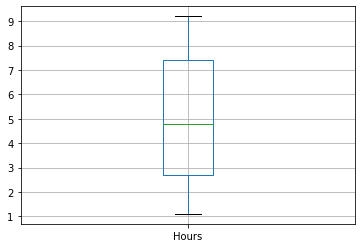

In [13]:
dataset.boxplot(column="Hours")

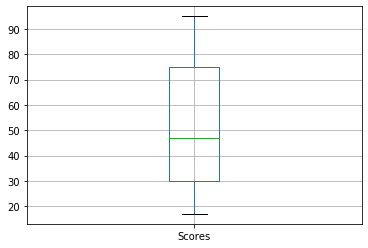

In [14]:
dataset.boxplot(column="Scores")

There is no outliers

# Checking linearity

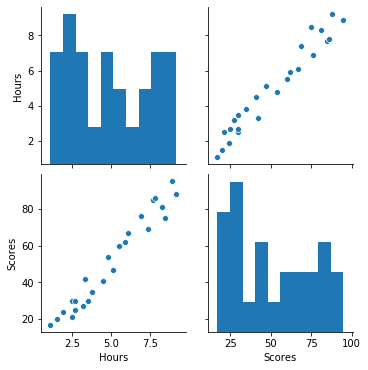

In [15]:
sns.pairplot(dataset)

From the above graph we can clearly see there is a positive linear relation between the number of hours studied and scores obtained.

# Normality

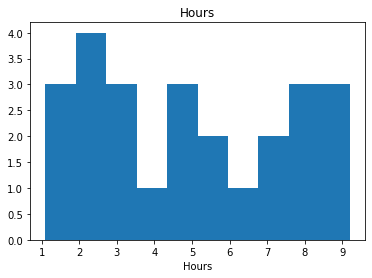

In [17]:
#frequency distribution of "Hours"
plt.hist(dataset.Hours)
plt.title('Hours')
plt.xlabel('Hours')
plt.show()

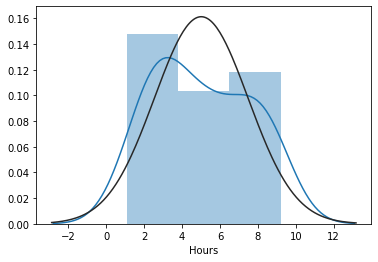

In [18]:
#seaborn distplot for Hours, where the black line highlighting the possible normal distribution curve
sns.distplot(dataset["Hours"], fit=norm)

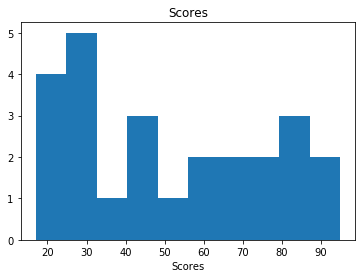

In [19]:
#frequency distribution of "Scores"
plt.hist(dataset.Scores)
plt.title('Scores')
plt.xlabel('Scores')
plt.show()

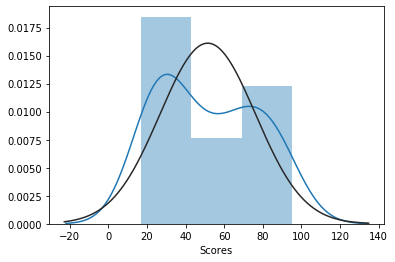

In [20]:
#seaborn distplot for Scores, where the black line highlighting the possible normal distribution curve
sns.distplot(dataset["Scores"], fit=norm)

# Data Visualization

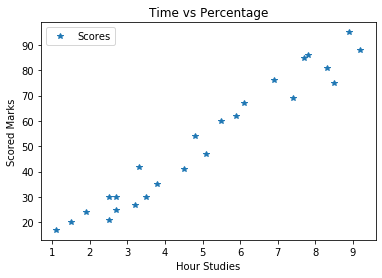

In [22]:
#Plotting the distribution of "Scores"
dataset.plot(x='Hours',y='Scores',style= "*")
plt.title('Time vs Percentage')
plt.xlabel('Hour Studies')
plt.ylabel('Scored Marks')
plt.show()

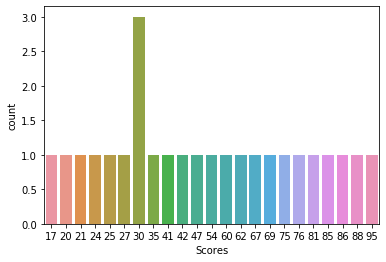

In [23]:
#Count of Scores
sns.countplot(dataset['Scores'])

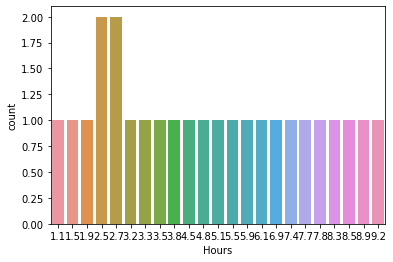

In [24]:
#Count of Hours
sns.countplot(dataset['Hours'])

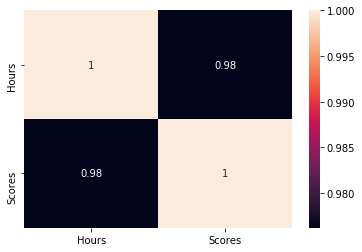

In [25]:
#Building correlation matrix
sns.heatmap(dataset.corr(), annot=True)


There is strong positive correlation among two variable

# Preparing the data

In [27]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values

# Dividing the dataset into Trainning and testing

In [28]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=0)


Here we split the data into 80% training and 20% testing

# Model Building

In [29]:
#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Testing the Data

In [30]:
# predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [32]:
#Comparing Actual vs Predicted
Data_new = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
Data_new

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [33]:
# print intercept and coefficients
print(lm.intercept_) #==> y-intercept
print(lm.coef_) #==> slope coefficients

2.018160041434683
[9.91065648]


In [34]:
#pair the feature names with the coefficients 
print(list(zip(dataset, lm.coef_)))

[('Hours', 9.910656480642237)]


# Plotting Regression Line

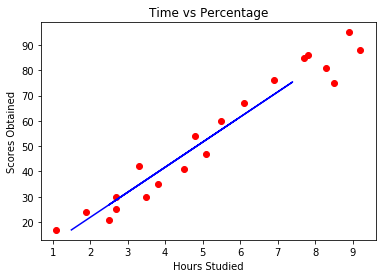

In [35]:
#Plotting the regression line for test dataset
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.title('Time vs Percentage')
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_test,Y_pred,color="blue")
plt.show()

# Predicting for value 9.25

In [36]:
#you can also test with your own data
hours = (9.25)
pred=lm.predict([[9.25]])
print('Number of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(pred))

Number of Hours = 9.25
Predicted Score = [93.69173249]


So, if a student studies for 9.25 hours a day then his/her predicted percentage score will be 93.6917%

# Model Evaluation

In [37]:
#Calculating R-square and Mean Absolute Error
#from sklearn import metrics
#print('R^2 Square:', metrics)
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#import numpy as np

r2=r2_score(Y_test,Y_pred)
print('R Square:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print('The Mean Square Error is ',rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R Squared is ',adjusted_r_squared)

print('The Mean Absolute Error is',metrics.mean_absolute_error(Y_test,Y_pred))

R Square: 0.9454906892105356
The Mean Square Error is  4.6474476121003665
Adjusted R Squared is  0.943120719176211
The Mean Absolute Error is 4.183859899002975


# The accuracy of the model is 94.55%.